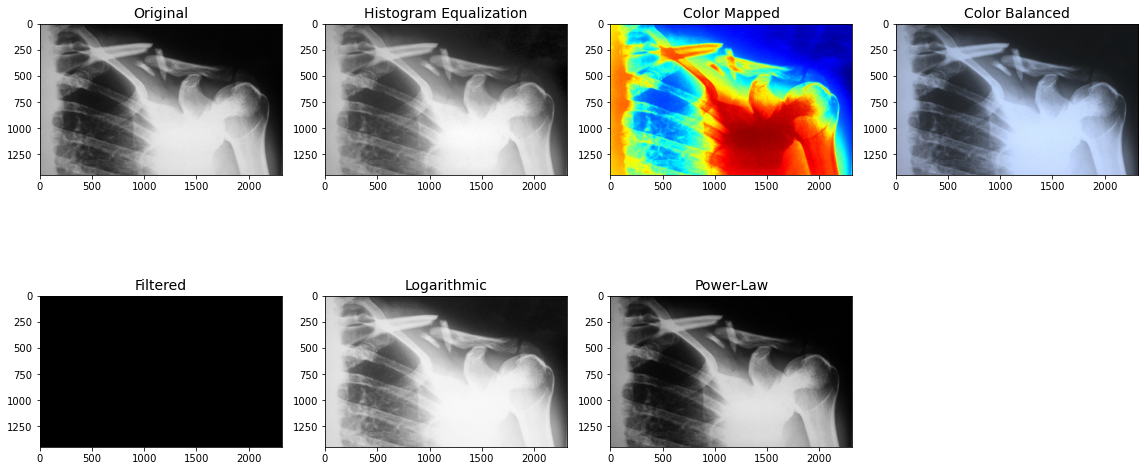

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

path = r'F:\Uni Work\CV Lab\Lab 3\task1.jpg'
original_image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 3\task1.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(2, 4, 1)
plt.title('Original', fontsize=14)
plt.imshow(original_image, cmap='gray')

enhanced_image = cv2.equalizeHist(original_image)
plt.subplot(2, 4, 2)
plt.title('Histogram Equalization', fontsize=14)
plt.imshow(enhanced_image, cmap='gray')

color_mapped_image = cv2.applyColorMap(enhanced_image, cv2.COLORMAP_JET)
plt.subplot(2, 4, 3)
plt.title('Color Mapped', fontsize=14)
plt.imshow(cv2.cvtColor(color_mapped_image, cv2.COLOR_BGR2RGB))

color_image = cv2.imread(path)
blue_scale = 1.2
green_scale = 1.0
red_scale = 0.9

adjusted_color_image = np.clip(color_image * [blue_scale, green_scale, red_scale], 0, 255).astype(np.uint8)
plt.subplot(2, 4, 4)
plt.title('Color Balanced', fontsize=14)
plt.imshow(cv2.cvtColor(adjusted_color_image, cv2.COLOR_BGR2RGB))

lower = np.array([0, 0, 150], dtype=np.uint8)
upper = np.array([50, 50, 255], dtype=np.uint8)
filtered_image = cv2.inRange(adjusted_color_image, lower, upper)
plt.subplot(2, 4, 5)
plt.title('Filtered', fontsize=14)
plt.imshow(filtered_image, cmap='gray')

logarithmic_image = np.log1p(original_image)
plt.subplot(2, 4, 6)
plt.title('Logarithmic', fontsize=14)
plt.imshow(logarithmic_image, cmap='gray')

gamma = 1.5
powerlaw = np.power(original_image / 255.0, gamma)
powerlaw = (powerlaw * 255).astype(np.uint8)
plt.subplot(2, 4, 7)
plt.title('Power-Law', fontsize=14)
plt.imshow(powerlaw, cmap='gray')

plt.tight_layout()
plt.show()

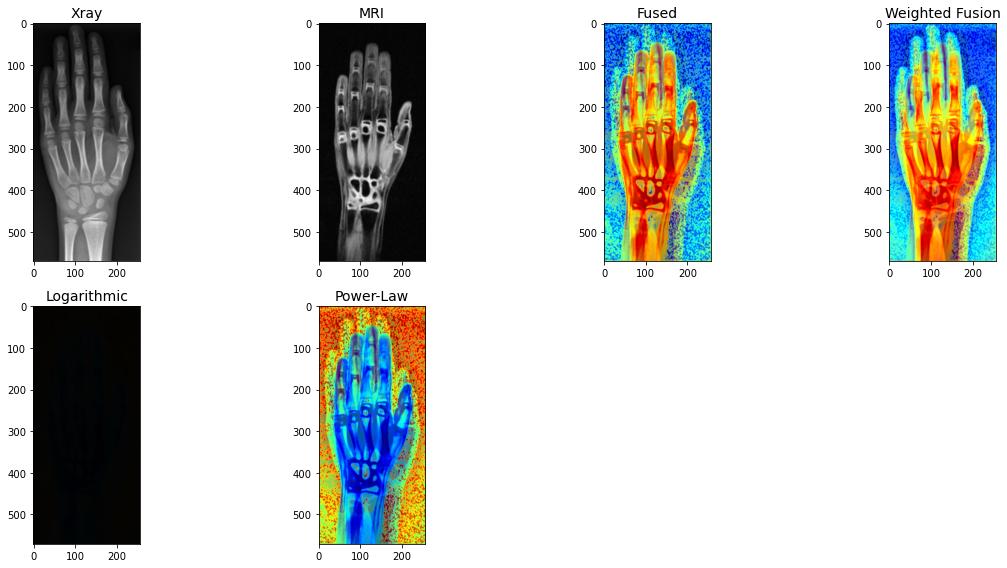

In [31]:
#task2
import cv2
import numpy as np
import matplotlib.pyplot as plt

xray_image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 3\xray.png', cv2.IMREAD_GRAYSCALE)
mri_image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 3\mri.png', cv2.IMREAD_GRAYSCALE)

size = (xray_image.shape[1], xray_image.shape[0])
resized = cv2.resize(mri_image, size)

xray_equalized = cv2.equalizeHist(xray_image)
mri_equalized = cv2.equalizeHist(resized)

xray_colormap = cv2.applyColorMap(xray_equalized, cv2.COLORMAP_JET)
mri_colormap = cv2.applyColorMap(mri_equalized, cv2.COLORMAP_JET)


alpha = 0.4
fused = cv2.addWeighted(xray_colormap, alpha, mri_colormap, 1 - alpha, 0)



xray_weight = 0.7
mri_weight = 0.4

weighted_fusion = cv2.addWeighted(xray_colormap, xray_weight, mri_colormap, mri_weight, 0)

log_fusion = np.log1p(fused)
gamma = 1.2
powerlaw = np.power(fused / 255.0, gamma)
powerlaw = (powerlaw * 255).astype(np.uint8)

log_fusion = np.clip(log_fusion, 0, 255).astype(np.uint8)
powerlaw = np.clip(powerlaw, 0, 255).astype(np.uint8)


########
plt.figure(figsize=(16, 8))
#####
plt.subplot(2, 4, 1)
plt.title('Xray', fontsize=14)
plt.imshow(xray_image, cmap='gray')

plt.subplot(2, 4, 2)
plt.title('MRI', fontsize=14)
plt.imshow(mri_image_resized, cmap='gray')

plt.subplot(2, 4, 3)
plt.title('Fused', fontsize=14)
plt.imshow(cv2.cvtColor(fused, cv2.COLOR_BGR2RGB))

plt.subplot(2, 4, 4)
plt.title('Weighted Fusion', fontsize=14)
plt.imshow(cv2.cvtColor(weighted_fusion, cv2.COLOR_BGR2RGB))

plt.subplot(2, 4, 5)
plt.title('Logarithmic', fontsize=14)
plt.imshow(log_fusion, cmap='gray')

plt.subplot(2, 4, 6)
plt.title('Power-Law', fontsize=14)
plt.imshow(powerlaw, cmap='gray')

plt.tight_layout()
plt.show()

In [33]:
#task3

import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)

cv2.namedWindow('cam', cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    #hist
    equalf = cv2.equalizeHist(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
    
    #heatmap
    heatmap_frame = cv2.applyColorMap(equalf, cv2.COLORMAP_JET)

    
    blue_scale = 1.1
    green_scale = 1.0
    red_scale = 0.2
    balanced_frame = np.clip(heatmap_frame * [blue_scale, green_scale, red_scale], 0, 255).astype(np.uint8)

    log_frame = np.log1p(equalf)

    gamma = 1.4
    powerlaw = np.power(equalf / 255.0, gamma)
    powerlaw = (powerlaw * 255).astype(np.uint8)

    cv2.imshow('cam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
